In [15]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rioxarray as rxr
import earthpy as et

# Get data and set wd
# et.data.get_data("colorado-flood")

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [16]:
# Define relative path to file
lidar_dem_path = os.path.join("data",
                              "data",
                              "colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

# Open data 
lidar_dem_im = rxr.open_rasterio(lidar_dem_path)

# View object dimensions
lidar_dem_im.shape

(1, 2000, 4000)

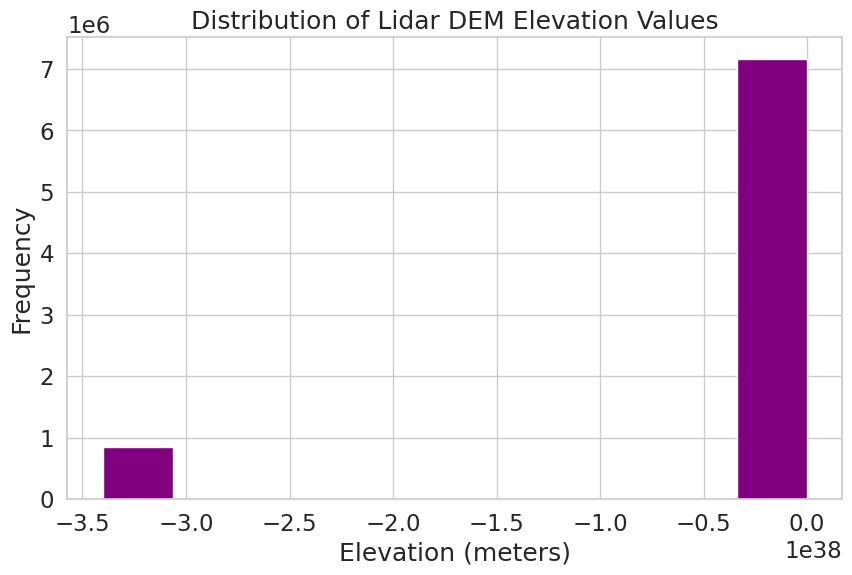

In [17]:
# Plot a histogram
f, ax = plt.subplots(figsize=(10, 6))
lidar_dem_im.plot.hist(ax=ax,
       color="purple")
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()


In [18]:
lidar_dem_im._FillValue

-3.4028235e+38

In [19]:
# Reload with masked=True to remove na values
lidar_dem_im = rxr.open_rasterio(lidar_dem_path, masked=True)

(array([252830., 633742., 573735., 323181., 217846., 214218., 199994.,
        197741., 217630., 246936., 274954., 315196., 342066., 376042.,
        363202., 380783., 387500., 367385., 283489., 224536., 179372.,
        140524., 117357.,  89156.,  74927.,  65253.,  39791.,  33309.,
         17697.,   7336.]),
 array([1676.20996094, 1689.91723633, 1703.62463379, 1717.33190918,
        1731.03930664, 1744.74658203, 1758.45397949, 1772.16125488,
        1785.86865234, 1799.57592773, 1813.2833252 , 1826.99060059,
        1840.69799805, 1854.40527344, 1868.1126709 , 1881.81994629,
        1895.52722168, 1909.23461914, 1922.94189453, 1936.64929199,
        1950.35656738, 1964.06396484, 1977.77124023, 1991.4786377 ,
        2005.18591309, 2018.89331055, 2032.60058594, 2046.3079834 ,
        2060.01538086, 2073.72265625, 2087.42993164]),
 <BarContainer object of 30 artists>)

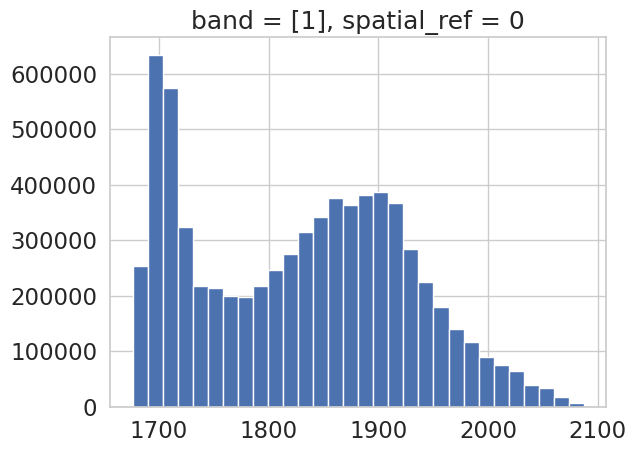

In [23]:
lidar_dem_im.plot.hist(bins=30)

### Customize Your Hstogram
Alternatively, you can specify specific break points that you want Python to use when it bins the data. Specifying custom break points can be a good way to begin to look for patterns in the data. In the next chapter, you will use this approach to identify visual break points that might make sense to use when manually classifying your data.

bins=[1600, 1800, 2000, 2100]

In this case, Python will count the number of pixels that occur within each value range as follows:

bin 1: number of pixels with values between 1600-1800
bin 2: number of pixels with values between 1800-2000
bin 3: number of pixels with values between 2000-2100

(array([2837918., 4049924.,  269886.]),
 array([1600., 1800., 2000., 2100.]),
 <BarContainer object of 3 artists>)

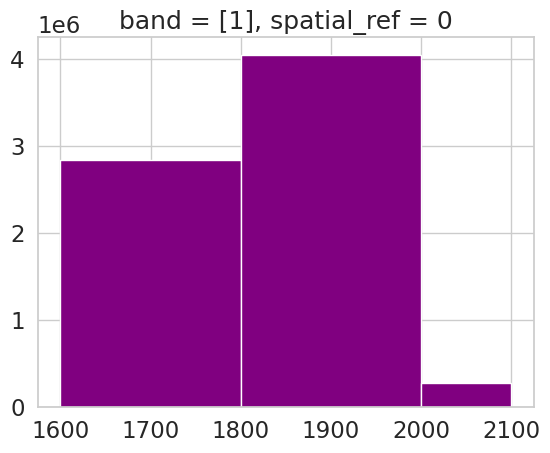

: 

In [24]:
lidar_dem_im.plot.hist(bins=[1600, 1800, 2000, 2100], color="purple")